In [19]:
#Here I will work with smaller sample. I excluded all words that appeared in more than 50% of the posts AND less than 1%
#later adjusted less than % so that we get roughly 4,200 columns. It slightly increase accuracy score. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  GridSearchCV,train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#As a result, we went from 21 thousand columns to roughly 4,200. 
X=pd.read_csv('data/words_few.csv')
y=pd.get_dummies(pd.read_csv('data/reddit_cleaned.csv')['subreddit'], drop_first=True)['relationships']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, train_size=0.9, random_state=11)

In [3]:
#gridsearch returns C close to 1, so I will not be doing gridsearch again, it takes way too long. 
sv=SVC()
sv.fit(X_train,y_train)
print(sv.score(X_train, y_train))
print(sv.score(X_test, y_test))
#The model is overfit, but not critically so. Its prediction power is on par with gridsearch and better 
#than the model that was using 20,000 columns. I like this. 

0.9567851373182552
0.8514492753623188


In [4]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=5)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.7176898222940227
0.6884057971014492


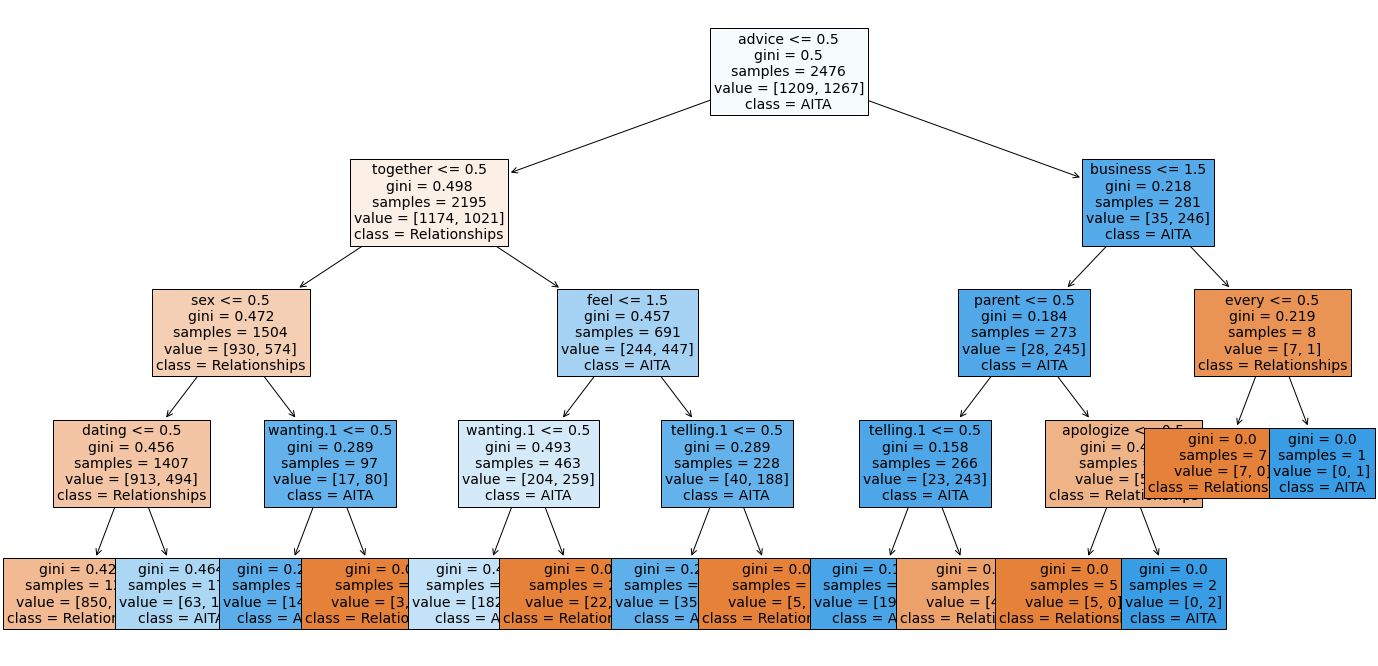

In [49]:
plt.figure(figsize=(24, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['Relationships', 'AITA'],
    filled=True,
    fontsize=14
);
#asshole showed up as the first divide and I should have predicted it. Removing it now and rerunning 
#the notebook. The model is not very useful, but I like its ability to make picture. 

In [6]:
#Ok, so what happened was that index wasn't deleted and machine learned to distinguish the subreddits 
#purely by index number producing perfect results.
#I updated the datafile and now rerunning the models. 

In [7]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, random_state=2022)
bag.fit(X_train, y_train)
print(bag.score(X_train, y_train))
print(bag.score(X_test, y_test))
#I think this is pretty good. Again, overfit, but prediction power is solid. 

1.0
0.8297101449275363


In [8]:
rf = RandomForestClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators=100)


In [9]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8218849788204627

In [10]:
cross_val_score(et, X_train, y_train, cv=5).mean()

0.86024926686217

In [11]:
rf_params = {
    'n_estimators': [100, 150, 200,400],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.834805311176279


{'max_depth': None, 'n_estimators': 400}

In [12]:
et_params = {
    'n_estimators': [100, 150, 200,400],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs_et = GridSearchCV(et, param_grid=et_params, cv=5)
gs_et.fit(X_train, y_train)
print(gs_et.best_score_)
gs_et.best_params_

0.8630767350928641


{'max_depth': None, 'n_estimators': 400}

In [13]:
tree = DecisionTreeClassifier(max_depth=1, random_state=111)
ada = AdaBoostClassifier(tree, n_estimators=100, learning_rate=1, algorithm='SAMME.R')
ada.fit(X_train, y_train)
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.8974151857835219
0.8188405797101449


In [14]:
gs_et.score(X_test,y_test)
#so far the performance is very similar, although extra trees have slight lead


0.8840579710144928

In [15]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.9095315024232633
0.8405797101449275


In [16]:
pgrid = {
    'learning_rate': [0.1, 1, 10],
    'n_estimators': [10, 100],
    'max_depth': [None, 1, 2, 3]
}

gb = GradientBoostingClassifier()
gs_gb = GridSearchCV(gb, pgrid, cv=5)
gs_gb.fit(X_train, y_train)
print(gs_gb.score(X_train, y_train))
print(gs_gb.score(X_test, y_test))

0.9135702746365105
0.8405797101449275


In [17]:
gs_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [22]:
#Now lets move to KNN and then finish with logistic regression. 
sc=StandardScaler()
X_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
pgrid = {
    'n_neighbors': [2,3,5,8,15,25]
}
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, pgrid, cv=5)
gs_knn.fit(X_sc, y_train)
print(gs_knn.score(X_sc, y_train))
print(gs_knn.score(X_test_sc, y_test))
gs_knn.best_params_
#well, I think it is to be expected. 

0.5823909531502424
0.5398550724637681


{'n_neighbors': 3}

In [21]:
logi=LogisticRegression()
logi.fit(X_train,y_train)
print(logi.score(X_train, y_train))
print(logi.score(X_test, y_test))

1.0
0.8369565217391305


In [38]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=5)
tree.fit(X_train, y_train)

X_list=[sv.score(X_test,y_test),tree.score(X_test, y_test),bag.score(X_test, y_test), gs.score(X_test, y_test),gs_et.score(X_test, y_test),ada.score(X_test, y_test),
        gs_gb.score(X_test, y_test),gs_knn.score(X_test_sc, y_test),logi.score(X_test, y_test)]
Y_list=['SVC', 'Single Tree','Bagging Classifier','Random Forest', 'Extra Trees','Ada Boost', 'Gradient Boost','KNN Classifier', 'Logistic Regression']
df_graph=pd.DataFrame()
df_graph['algorithm']=Y_list
df_graph['score']=X_list
df_graph=df_graph.set_index(df_graph['algorithm']).drop(['algorithm'],axis=1)
df_graph

,score
algorithm,
SVC,0.851449
Single Tree,0.688406
Bagging Classifier,0.829710
Random Forest,0.847826
Extra Trees,0.884058
Ada Boost,0.818841
Gradient Boost,0.840580
KNN Classifier,0.539855
Logistic Regression,0.836957


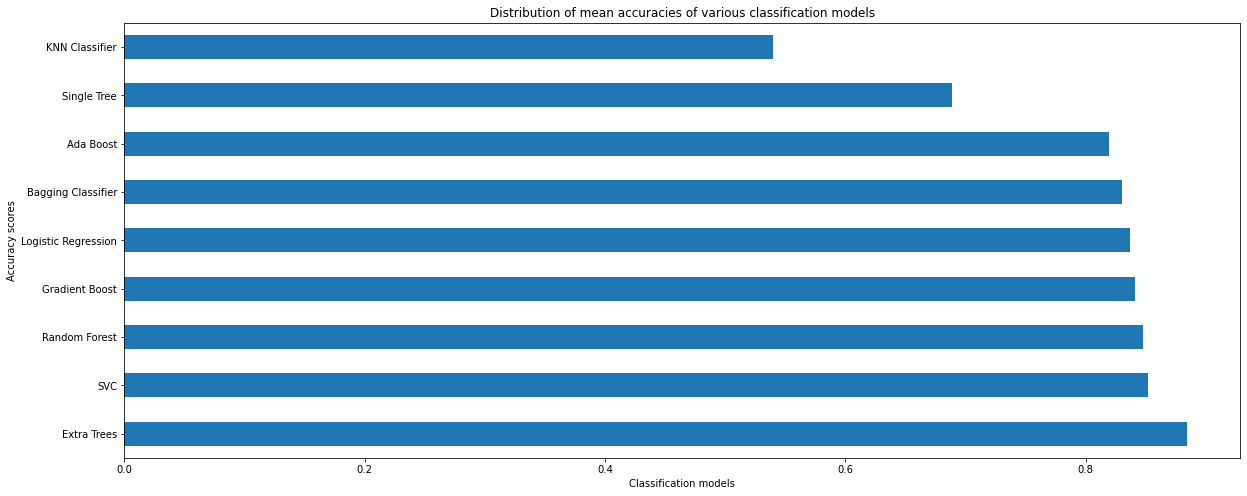

In [41]:
plt.figure(figsize=(20,8))
df_graph['score'].sort_values(ascending = False).plot(kind='barh')


plt.xlabel('Classification models') 
plt.ylabel('Accuracy scores') 
plt.title("Distribution of mean accuracies of various classification models");

,score
algorithm,
SVC,0.851449
Single Tree,0.688406
Bagging Classifier,0.829710
Random Forest,0.847826
Extra Trees,0.884058
Ada Boost,0.818841
Gradient Boost,0.840580
KNN Classifier,0.539855
Logistic Regression,0.836957
